In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import math
import numpy as np

In [2]:
FCC_Rh = pd.DataFrame({"2theta":np.linspace(6,90, 2500), "Intensity":np.zeros(2500)}).set_index("2theta")
FCC_Rh.loc[np.logical_and(FCC_Rh.index < 41.2, FCC_Rh.index > 41.1), "Intensity"] = 1
FCC_Rh.loc[np.logical_and(FCC_Rh.index < 47.9, FCC_Rh.index > 47.8), "Intensity"] = 0.2
FCC_Rh.loc[np.logical_and(FCC_Rh.index < 70.1, FCC_Rh.index > 70.0), "Intensity"] = 0.2
FCC_Rh.loc[np.logical_and(FCC_Rh.index < 84.6, FCC_Rh.index > 84.5), "Intensity"] = 0.1
FCC_Rh["Intensity"] += 0.25

FCC_Ru = pd.DataFrame({"2theta":np.linspace(6,90, 2500), "Intensity":np.zeros(2500)}).set_index("2theta")
FCC_Ru.loc[np.logical_and(FCC_Ru.index < 40.8, FCC_Ru.index > 40.7), "Intensity"] = 1
FCC_Ru.loc[np.logical_and(FCC_Ru.index < 47.5, FCC_Ru.index > 47.4), "Intensity"] = 0.52
FCC_Ru.loc[np.logical_and(FCC_Ru.index < 69.4, FCC_Ru.index > 69.3), "Intensity"] = 0.35
FCC_Ru.loc[np.logical_and(FCC_Ru.index < 83.75, FCC_Ru.index > 83.6), "Intensity"] = 0.4
FCC_Ru.loc[np.logical_and(FCC_Ru.index < 88.4, FCC_Ru.index > 88.3), "Intensity"] = 0.12
FCC_Ru["Intensity"] += 0.25

FCC_Pt = pd.DataFrame({"2theta":np.linspace(6,90, 2500), "Intensity":np.zeros(2500)}).set_index("2theta")
FCC_Pt.loc[np.logical_and(FCC_Pt.index < 39.8, FCC_Pt.index > 39.7), "Intensity"] = 1
FCC_Pt.loc[np.logical_and(FCC_Pt.index < 46.3, FCC_Pt.index > 46.2), "Intensity"] = 0.53
FCC_Pt.loc[np.logical_and(FCC_Pt.index < 67.5, FCC_Pt.index > 67.4), "Intensity"] = 0.4
FCC_Pt.loc[np.logical_and(FCC_Pt.index < 85.7, FCC_Pt.index > 85.6), "Intensity"] = 0.15
FCC_Pt["Intensity"] += 0.25

FCC_Ir = pd.DataFrame({"2theta":np.linspace(6,90, 2500), "Intensity":np.zeros(2500)}).set_index("2theta")
FCC_Ir.loc[np.logical_and(FCC_Ir.index < 40.7, FCC_Ir.index > 40.6), "Intensity"] = 1
FCC_Ir.loc[np.logical_and(FCC_Ir.index < 47.4, FCC_Ir.index > 47.3), "Intensity"] = 0.52
FCC_Ir.loc[np.logical_and(FCC_Ir.index < 69.2, FCC_Ir.index > 69.1), "Intensity"] = 0.35
FCC_Ir.loc[np.logical_and(FCC_Ir.index < 83.5, FCC_Ir.index > 83.4), "Intensity"] = 0.43
FCC_Ir.loc[np.logical_and(FCC_Ir.index < 88.1, FCC_Ir.index > 88.0), "Intensity"] = 0.12
FCC_Ir["Intensity"] += 0.25

FCC_Pd = pd.DataFrame({"2theta":np.linspace(6,90, 2500), "Intensity":np.zeros(2500)}).set_index("2theta")
FCC_Pd.loc[np.logical_and(FCC_Pd.index < 40.2, FCC_Pd.index > 40.1), "Intensity"] = 1
FCC_Pd.loc[np.logical_and(FCC_Pd.index < 46.7, FCC_Pd.index > 46.6), "Intensity"] = 0.52
FCC_Pd.loc[np.logical_and(FCC_Pd.index < 68.2, FCC_Pd.index > 68.1), "Intensity"] = 0.35
FCC_Pd.loc[np.logical_and(FCC_Pd.index < 82.2, FCC_Pd.index > 82.1), "Intensity"] = 0.4
FCC_Pd.loc[np.logical_and(FCC_Pd.index < 86.7, FCC_Pd.index > 86.6), "Intensity"] = 0.12
FCC_Pd["Intensity"] += 0.25


In [3]:
x = np.linspace(5, 85, 5100)
own_data = pd.read_csv("Own XRD/Ru Pt Pd Ir 29-09-22.xy",sep =" ", names=["Intensity"], index_col=0, skiprows= 1 )
RuRu = pd.read_csv("Own XRD/maria Ru 2 before co_exported.xy",sep =" ", names=["Intensity"], index_col=0, skiprows= 1 )
RuRh = pd.read_csv("Maria XRD/RuRh 15-09-22.csv", names=["Intensity"], header=None)
RuPt = pd.read_csv("Maria XRD/RuPt 80-20.csv", names=["Intensity"], header=None)
RuPd = pd.read_csv("Maria XRD/RuPd.csv", names=["Intensity"], header=None)
RuIr = pd.read_csv("Maria XRD/RuIr.csv", names=["Intensity"], header=None)
RuPdPt = pd.read_csv("Maria XRD/RuPtPd 15-09-22.csv", names=["Intensity"], header=None)
RuPdPtIr = pd.read_csv("Maria XRD/RuPtPdIr 15-09-22.csv", names=["t", "Intensity"], header=None)
RuPdPtIrRh = pd.read_csv("Maria XRD/sample 21_exported.xy", names=["t", "Intensity"], header=2, sep = " ", index_col=0)

#FCC_Ir = pd.read_excel("Maria XRD/theoritical_phases.xls", sheet_name = "Ir", index_col= 0 , header = None, usecols=[0,1], names = ["2theta","Intensity"])
#FCC_Pd = pd.read_excel("Maria XRD/theoritical_phases.xls", sheet_name = "Pd", index_col= 0 , header = None, usecols=[0,1], names = ["2theta","Intensity"])
#FCC_Pt = pd.read_excel("Maria XRD/theoritical_phases.xls", sheet_name = "Pt", index_col= 0 , header = None, usecols=[0,1], names = ["2theta","Intensity"])
HCP_Ru = pd.read_excel("Maria XRD/theoritical_phases.xls", sheet_name = "Ru", index_col= 0 , header = None, usecols=[0,1], names = ["2theta","Intensity"])

RuRu["Intensity"] = RuRu["Intensity"].apply(lambda x : x/np.max(RuRu["Intensity"]))
RuRh["Intensity"] = RuRh["Intensity"].apply(lambda x : x/np.max(RuRh["Intensity"]))
RuPt["Intensity"] = RuPt["Intensity"].apply(lambda x : x/np.max(RuPt["Intensity"]))
RuPd["Intensity"] = RuPd["Intensity"].apply(lambda x : x/np.max(RuPd["Intensity"]))
RuIr["Intensity"] = RuIr["Intensity"].apply(lambda x : x/np.max(RuIr["Intensity"]))
RuPdPt["Intensity"] = RuPdPt["Intensity"].apply(lambda x : x/np.max(RuPdPt["Intensity"]))
RuPdPtIr["Intensity"] = RuPdPtIr["Intensity"].apply(lambda x : x/np.max(RuPdPtIr["Intensity"]))
RuPdPtIrRh["Intensity"] = RuPdPtIrRh["Intensity"].apply(lambda x : x/np.max(RuPdPtIrRh["Intensity"]))

#FCC_Ir["Intensity"] = FCC_Ir["Intensity"].apply(lambda x : x/np.max(FCC_Ir["Intensity"]))
#FCC_Pd["Intensity"] = FCC_Pd["Intensity"].apply(lambda x : x/np.max(FCC_Pd["Intensity"]))
#FCC_Pt["Intensity"] = FCC_Pt["Intensity"].apply(lambda x : x/np.max(FCC_Pt["Intensity"]))
HCP_Ru["Intensity"] = HCP_Ru["Intensity"].apply(lambda x : x/np.max(HCP_Ru["Intensity"]))

In [4]:
start_value = 6
end_value = HCP_Ru.index[0]  # The current starting value of 2theta in HCP_Ru

# Create a new dataframe with the required range of 2theta values
new_index = pd.Index(np.arange(start_value, end_value, 0.02), name='2theta')
new_data = pd.DataFrame(0, index=new_index, columns=['Intensity'])

HCP_Ru = pd.concat([new_data, HCP_Ru])
HCP_Ru = HCP_Ru[HCP_Ru.index <=90]



In [5]:
RuRu.

,Intensity
5.000000,0.076119
5.014853,0.058209
5.029706,0.060448
5.044559,0.064179
5.059412,0.076119
...,...
79.947889,0.119403
79.962742,0.129104
79.977595,0.120896
79.992448,0.138060


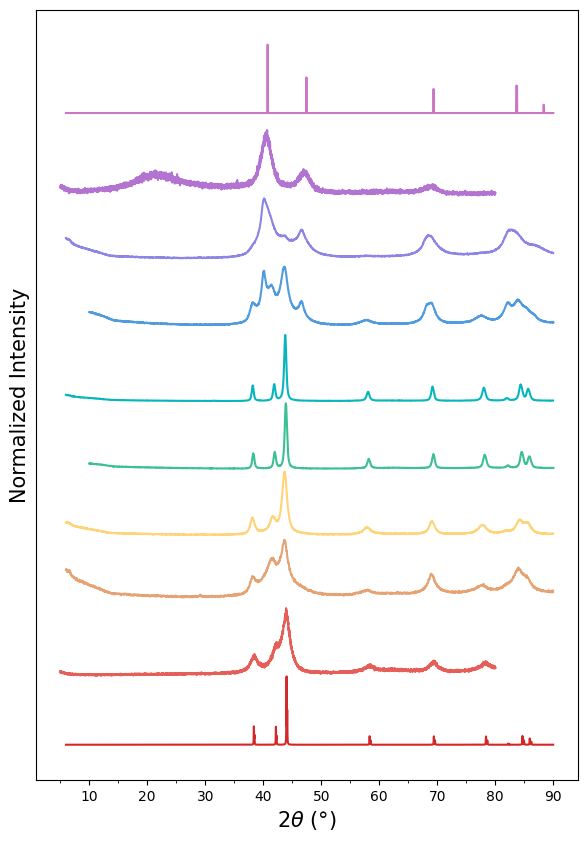

In [6]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import colors
import matplotlib.colors as clr

plt.style.use("default")
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111)
plt.xticks(np.arange(0,80,10))
# plt.xlim(5,81)

samples = [HCP_Ru, RuRu, RuPt, RuPd, RuRh, RuIr, RuPdPt, RuPdPtIr, RuPdPtIrRh, FCC_Ru]

color_palette = ["#d62728", "#e55e57", "#e5a273", "#ffd479", "#3bc093", "#07b5bc", "#509bdd", "#8d85e5", "#b373d0", "#CB76C5"]
softened_colors = ["#e55e57", "#d07c38", "#af9633", "#86ac50", "#51b77e", "#0dbbae", "#00b7d3", "#30a9ea", "#8b93e8", "#cb76c5"]

for i in range(len(samples)): 
    plt.plot(samples[i]["Intensity"] + i, color = color_palette[i])

#plt.vlines(x = FCC_Ru[0,:-2], ymin=0, ymax= i + 1, ls = "--", label = "FCC Ru", color = "red")
#plt.vlines(x = HCP_Ru[0,:-2], ymin=0, ymax= i + 1, ls = "-.", label = "HCP Ru")

ax.set_yticks([])
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

plt.xlabel(r"2$\theta$ (°)")
plt.ylabel("Normalized Intensity")
plt.savefig("All_XRDs", dpi=500, bbox_inches='tight')

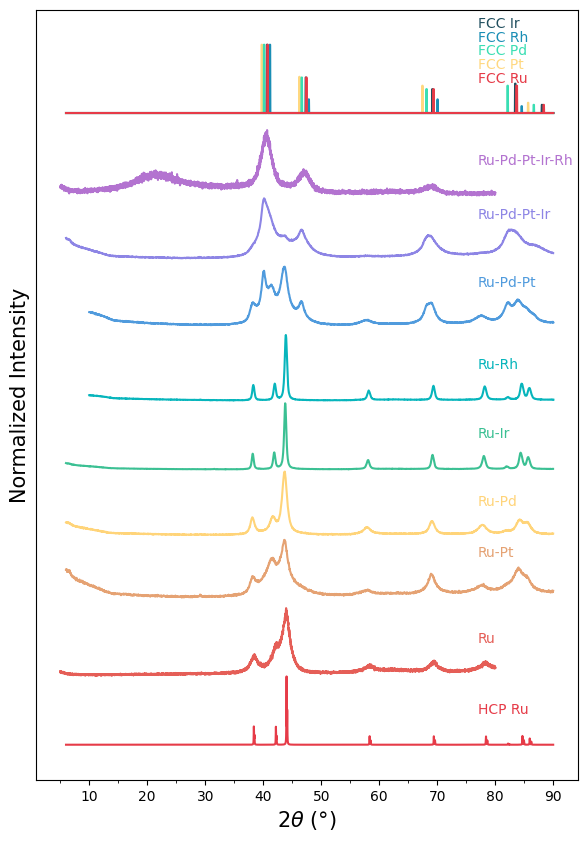

In [17]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt

# Create custom colormap
cmap = clr.LinearSegmentedColormap.from_list('custom blue', 
                                             [(0, '#00A676'),
                                              (0.5, "#296a5a"),
                                              (1, '#082423')])



# Set style and figure size
plt.style.use("default")
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111)
plt.xticks(np.arange(0, 80, 10))

# Example samples and their names
samples = [RuRu, RuPt, RuPd, RuIr, RuRh, RuPdPt, RuPdPtIr, RuPdPtIrRh]
phases = [FCC_Ir, FCC_Pd, FCC_Pt, FCC_Rh, FCC_Ru]
sample_names = ["Ru", "Ru-Pt", "Ru-Pd", "Ru-Ir", "Ru-Rh", "Ru-Pd-Pt", "Ru-Pd-Pt-Ir", "Ru-Pd-Pt-Ir-Rh"]
sample_colors = ["#e55e57", "#e5a273", "#ffd479", "#3bc093", "#07b5bc", "#509bdd", "#8d85e5", "#b373d0"]
intensity_at_81 = [ 0.5, 0.75, 0.5, 0.5, 0.5, 0.7, 0.7, 0.5]

# Generate colors from the colormap
num_samples = len(samples)
num_phases = len(phases) + 1
#sample_colors = [cmap(i / (num_samples - 1)) for i in range(num_samples)]

# plot the HCP Ru Phase
plt.plot(HCP_Ru["Intensity"], color= "#e63b48")
plt.text(77, 0.45, "HCP Ru", va='baseline', color = "#e63b48")

# Plotting each sample with its color and adding text labels
for i, sample in enumerate(samples): 
    if isinstance(sample, pd.DataFrame):
        plt.plot(sample["Intensity"] + i + 1, color=sample_colors[i])
        plt.text(77, i + intensity_at_81[i] + 1, sample_names[i], va='baseline', color = sample_colors[i])



# Plot FCC phase of Ru, Pt, Pd, Ir, Rh
plt.plot(FCC_Ru["Intensity"] + num_samples + 1, color = "#e63b48", zorder = 3)
plt.text(77, num_samples + 1 + 0.7, "FCC Ru", va='baseline', color = "#e63b48" )

plt.plot(FCC_Pt["Intensity"] + num_samples + 1, color = "#ffd880")
plt.text(77, num_samples + 1 + 0.9 , "FCC Pt", va='baseline', color = "#ffd880")

plt.plot(FCC_Pd["Intensity"] + num_samples + 1, color = "#39deb3")
plt.text(77, num_samples + 1 + 1.1, "FCC Pd", va='baseline', color = "#39deb3")

plt.plot(FCC_Rh["Intensity"] + num_samples + 1, color = "#1a8eb5")
plt.text(77, num_samples + 1 + 1.3, "FCC Rh", va='baseline', color = "#1a8eb5")

plt.plot(FCC_Ir["Intensity"] + num_samples + 1, color = "#204f5e")
plt.text(77, num_samples + 1 + 1.5, "FCC Ir", va='baseline', color = "#204f5e")

# Customizing axis ticks and labels
ax.set_yticks([])
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

plt.xlabel(r"2$\theta$ (°)")
plt.ylabel("Normalized Intensity")
plt.savefig("All_XRDs", dpi=700, bbox_inches='tight')

plt.show()